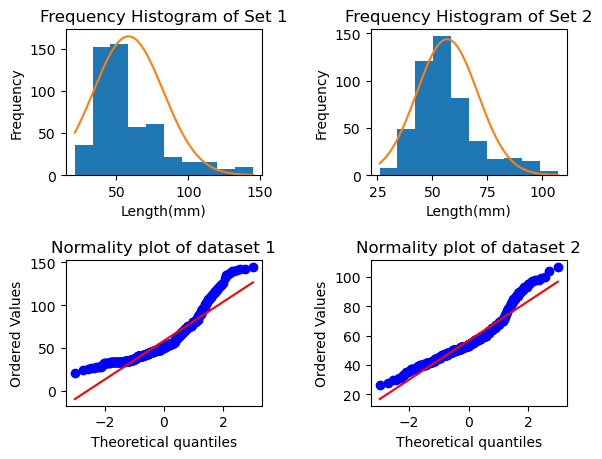

,mean,variance,standard deviation,median
0,58.301887,586.905091,24.226124,51.0
1,56.698189,192.102069,13.860089,54.0


,Length of leftovers,size of each subset,total number of subsets
0,1,23,23.0
1,3,26,19.0


Text(0.5, 1.0, 'Normality plot of subset 2')

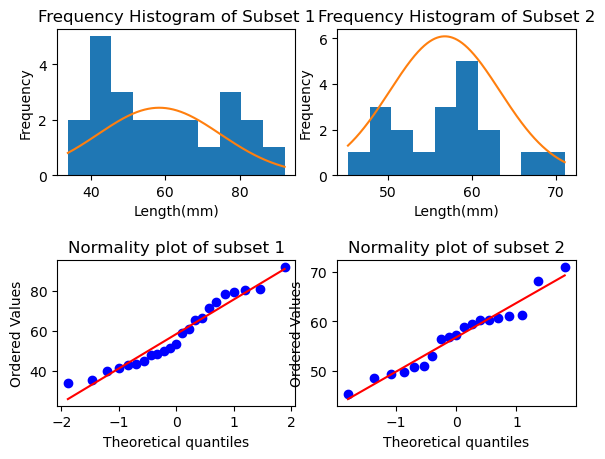

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stat
# import csv file and convert it to dataframe
file1 = 'Isermann_Bluegill_Sampling_TotalLengths-1.csv'
file2 = 'Isermann_Bluegill_Sampling_Total Lengths-2.csv'
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
# convert the dataframe to list
data1 = df1['Total length (mm)'].tolist()
data2 = df2['Total length (mm)'].tolist()
# sort the list from smallest value to the largest value
sdata1 = sorted(data1)
sdata2 = sorted(data2)
#subplot 1: histogram of data set 1
plt.subplot(221)
plt.hist(data1)
plt.gca().set(title = "Frequency Histogram of Set 1",ylabel = "Frequency",xlabel = "Length(mm)")
x1 = np.linspace(min(data1),max(data1),1000)
y1 = norm(loc = np.mean(sdata1), scale = np.std(sdata1)).pdf(x1)
plt.plot(x1,10000*y1)
#subplot 2: histogram of data set 2
plt.subplot(222)
plt.gca().set(title = "Frequency Histogram of Set 2",ylabel = "Frequency", xlabel = "Length(mm)")
plt.hist(data2)
plt.tight_layout(pad =3)
x2 = np.linspace(min(data2),max(data2),1000)
y2 = norm(loc = np.mean(sdata2), scale = np.std(sdata2)).pdf(x2)
plt.plot(x2,5000*y2)
#subplot 3: normality diagram of data set 1
plt.subplot(223)
stats.probplot(sdata1,dist = 'norm',plot = plt)
plt.title('Normality plot of dataset 1')
#subplot 4: normality diagram of data set 2
plt.subplot(224)
stats.probplot(sdata2,dist = 'norm',plot = plt)
plt.title('Normality plot of dataset 2')
plt.show()
# sample statistics for Total length dataset 1
mean1 = np.mean(data1)
var1 = np.var(data1)
std1 = np.sqrt(var1)
median1 = np.median(data1)
# sample statistics for Total length dataset 2
mean2 = np.mean(data2)
var2 = np.var(data2)
std2 = np.sqrt(var2)
median2 = np.median(data2)
# display the sample statistics in a dataframe
name =['mean','variance','standard deviation','median']
sample = [[mean1,var1,std1,median1],[mean2,var2,std2,median2]]
sample_df = pd.DataFrame(sample,columns = name)
display(sample_df)
#Find the smallest leftovers of dataset 1
#length of leftovers 
l1 = len(data1) % 23
# the size of each subset
n1 = 23
#number of subsets 
d1 = 0
#function to find the size with the smallest leftovers
for i in range(23,28):
    if (len(data1) % i < l1):
        l1 = len(data1) % i
        n1 = i
d1 = (len(data1)-l1)/n1
#Find the smallest leftovers of dataset 2
#length of leftovers
l2 = len(data2) % 23
# the denominator used for division
n2 = 23
d2=  0
#function to find the size with the smallest leftovers
for i in range(23,28):
    if (len(data2) % i < l2):
        l2 = len(data2) % i
        n2 = i
d2 = (len(data2)-l2)/n2
#** for both datasets, results are displayed in a dataframe as shown
name1 = ['Length of leftovers','size of each subset','total number of subsets']
sample1 = [[l1,n1,d1],[l2,n2,d2]]
sample1_df = pd.DataFrame(sample1,columns = name1)
display(sample1_df)
#function to divide lists into subsets of even sizes 
def divide_list(data, subset_size):
    subsets = []
    for i in range(0, len(data), subset_size):
        subsets.append(data[i:i + subset_size])
    return subsets
#remove the leftovers from datasets
data1 = data1[:-l1]
data2 = data2[:-l2]
subset1 = divide_list(data1,n1)
subset2 = divide_list(data2,n2)
subset_mean1 = []
subset_mean2 = []
#add means to a new lists
for j in range (len(subset1)):
    mean = np.mean(subset1[j])
    subset_mean1.append(mean)
for k in range(len(subset2)):
    mean = np.mean(subset2[k])
    subset_mean2.append(mean)
#display 
df_subset1 = pd.DataFrame(subset_mean1,columns = ["MeanLengths-1"])
df_subset2 = pd.DataFrame(subset_mean2,columns = ["MeanLengths-2"])
df_subset1.to_csv("MeanLengths-1",index= False)
df_subset2.to_csv("MeanLengths-2",index= False)
ssubset_mean1 = sorted(subset_mean1)
ssubset_mean2 = sorted(subset_mean2)
#subplot of frequency histrogram of subset_mean 1
plt.subplot(221)
plt.gca().set(title = "Frequency Histogram of Subset 1",ylabel = "Frequency", xlabel = "Length(mm)")
plt.hist(subset_mean1)
a1 = np.linspace(min(subset_mean1),max(subset_mean1),1000)
b1 = norm(loc = np.mean(subset_mean1), scale = np.std(subset_mean1)).pdf(a1)
plt.plot(a1,100*b1)
plt.tight_layout(pad =3)
#subplot of frequency histrogram of subset_mean 2
plt.subplot(222)
plt.gca().set(title = "Frequency Histogram of Subset 2",ylabel = "Frequency", xlabel = "Length(mm)")
plt.hist(subset_mean2)
a2 = np.linspace(min(subset_mean2),max(subset_mean2),1000)
b2 = norm(loc = np.mean(subset_mean2), scale = np.std(subset_mean2)).pdf(a2)
plt.plot(a2,100*b2)
#subplot of Normality diagram of subsetmean 1
plt.subplot(223)
stats.probplot(ssubset_mean1,dist = 'norm',plot = plt)
plt.title('Normality plot of subset 1')
#subplot of Normality diagram of subsetmean 2
plt.subplot(224)
stats.probplot(ssubset_mean2,dist = 'norm',plot = plt)
plt.title('Normality plot of subset 2')
#hint for the last question is attached in the same folder, might be helpful :)